In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

import skrf
skrf.setup_pylab(use_skrf_style=True)

import sys; sys.path.insert(0, r"C:\Coding\Python\scikit-rf\qtapps")
import skrf_qtwidgets
from skrf_qtwidgets.analyzers.analyzer_agilent_e8363C import Analyzer

nwa = Analyzer()

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Miniconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### OPTIONAL METHODS TO OVERRIDE FOR SKRF_QTWIDGETS
* init - setup the instrument resource (i.e., pyvisa)
* get_twoport_ntwk  -- *requires implementing get_snp_network*
* get_oneport_ntwk  -- *requires implementing get_snp_network*
* enter/exit - for using python's with statement

`
with Analyzer("GPIB0::16::ISNTR") as nwa:
    ntwk = nwa.measure_twoport_ntwk()
`

### METHODS THAT MUST BE IMPLEMENTED FOR SKRF_QTWIDGETS
* get_traces
* get_list_of_traces
* get_snp_network
* get_switch_terms
* set_frequency_sweep

### OPTIONAL CLASS PROPERTIES TO OVERRIDE
* DEFAULT_VISA_ADDRESS
* NAME
* NPORTS
* NCHANNELS

In [3]:
nwa.set_frequency_sweep(12.2, 18, 201, f_unit='GHz')  # Ku-Band

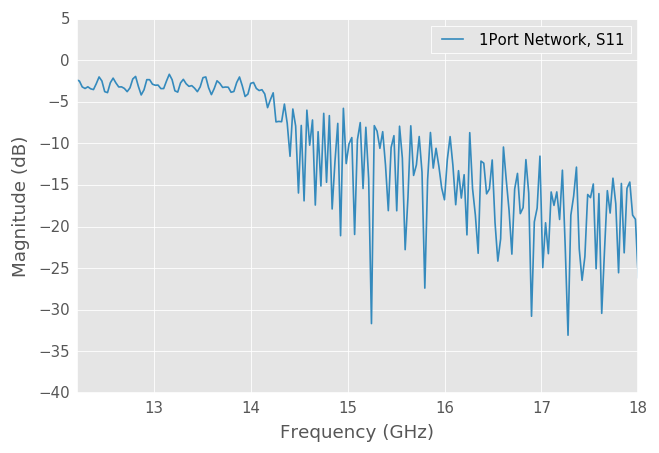

In [4]:
ntwk = nwa.get_oneport_ntwk(port=1, sweep=True)
ntwk.plot_s_db()

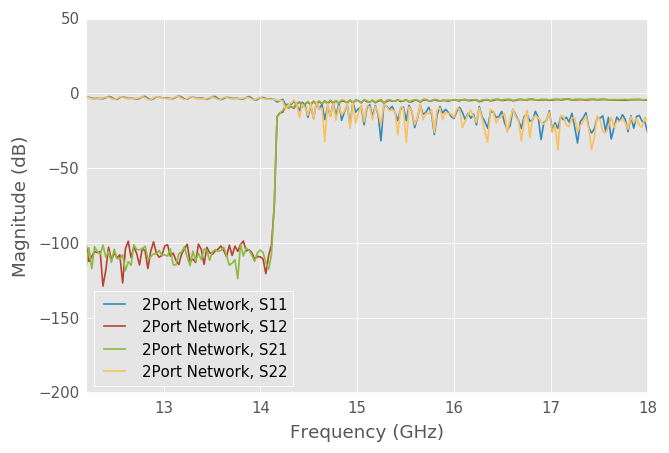

In [5]:
ntwk = nwa.get_twoport_ntwk(ports=(1,2), sweep=False)
ntwk.plot_s_db()

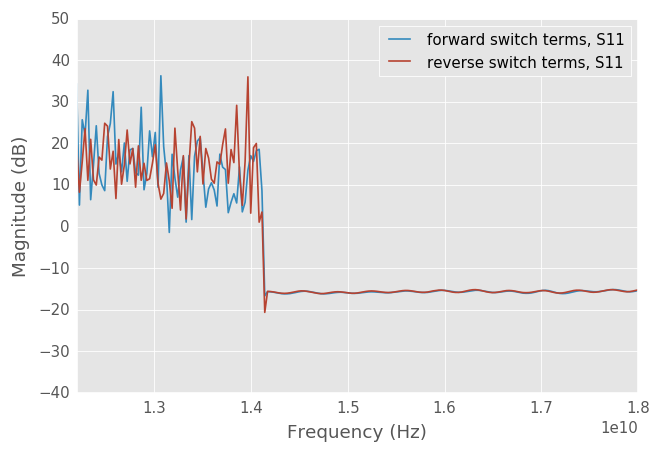

In [6]:
fwd, rev = nwa.get_switch_terms(ports=(1, 2))
fwd.plot_s_db()
rev.plot_s_db()

In [7]:
trace_list = nwa.get_list_of_traces()
trace_list

[{'channel': '1',
  'label': 'S11 - Chan1,Meas1',
  'measurement': '1',
  'name': 'CH1_S11_1',
  'parameter': 'S11'},
 {'channel': '1',
  'label': 'S12 - Chan1,Meas2',
  'measurement': '2',
  'name': 'CH1_S12_2',
  'parameter': 'S12'},
 {'channel': '1',
  'label': 'S21 - Chan1,Meas3',
  'measurement': '3',
  'name': 'CH1_S21_3',
  'parameter': 'S21'},
 {'channel': '1',
  'label': 'S22 - Chan1,Meas4',
  'measurement': '4',
  'name': 'CH1_S22_4',
  'parameter': 'S22'}]

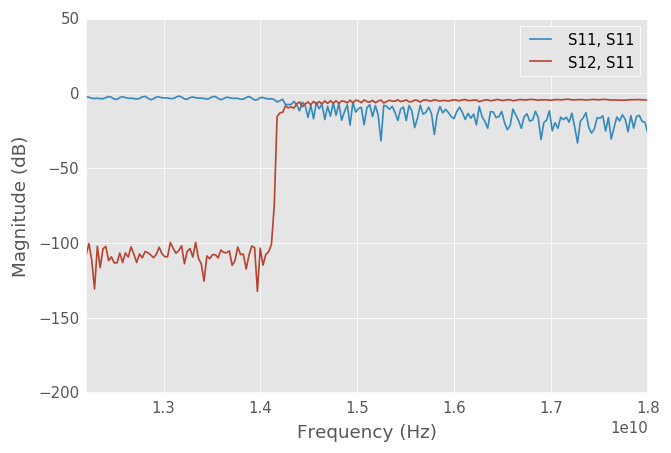

In [8]:
traces = nwa.get_traces(trace_list[0:2])
for trace in traces:
    trace.plot_s_db()